In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Leer Datos

In [104]:
# Read data from file
data = pd.read_csv("../outp/dif.dat", sep=" ", header=None)
data.columns = ["t", "id", "x", "y", "vx", "vy"]
data.set_index("id", inplace=True)

#//print(data.index.unique().to_numpy())

data

,t,x,y,vx,vy
id,,,,,
0,0.0,0.000000,0.000000,0.000000,0.000000
0,0.1,0.038926,0.018319,0.375968,-2.010900
0,0.2,-0.089819,-0.437754,-1.812910,-5.089820
0,0.3,-0.175973,-0.746185,-1.998360,-0.847697
0,0.4,-0.205608,-0.724176,-1.512060,1.674500
...,...,...,...,...,...
0,99.6,-2.019390,-6.722090,1.494410,-1.088430
0,99.7,-2.091300,-6.639090,0.089225,1.822670
0,99.8,-1.877980,-6.289770,2.978420,1.490920


# Pruebas

In [105]:
sigma = np.mean( np.power(data["vx"], 2) + np.power(data["vy"], 2) )
dtmin = data.loc[0]["t"].to_numpy()[1] - data.loc[0]["t"].to_numpy()[0] 
t = 100

#comparar funciones de autocorrelacion
def vel_autocorr(t): #< v(t) * v(t+dt) > / < v(t) * v(t) >
    shifts = np.arange(0, int(t/dtmin)+1, 1)
    autocorr = np.zeros(shifts.size)
    for i in shifts:
        autocorr[i] = np.nanmean( data["vx"] * data["vx"].shift(-i) + data["vy"] * data["vy"].shift(-i) ) / sigma
    return autocorr

def autocorrelation(dt): 
    v = np.sqrt(data["vx"]**2 + data["vy"]**2)
    n = len(v)
    result = np.correlate(v, v, mode='full')
    result = result[result.size // 2:] / np.arange(n, 0, -1)
    return result * dt  #! la funcion no debe depender de dt tan fuertemente

def autocorrelation2(dt):
    v = np.sqrt(data["vx"]**2 + data["vy"]**2)
    result = np.correlate(v, v, mode='full')
    result = result[result.size // 2:]
    return result

1001 1001 1001


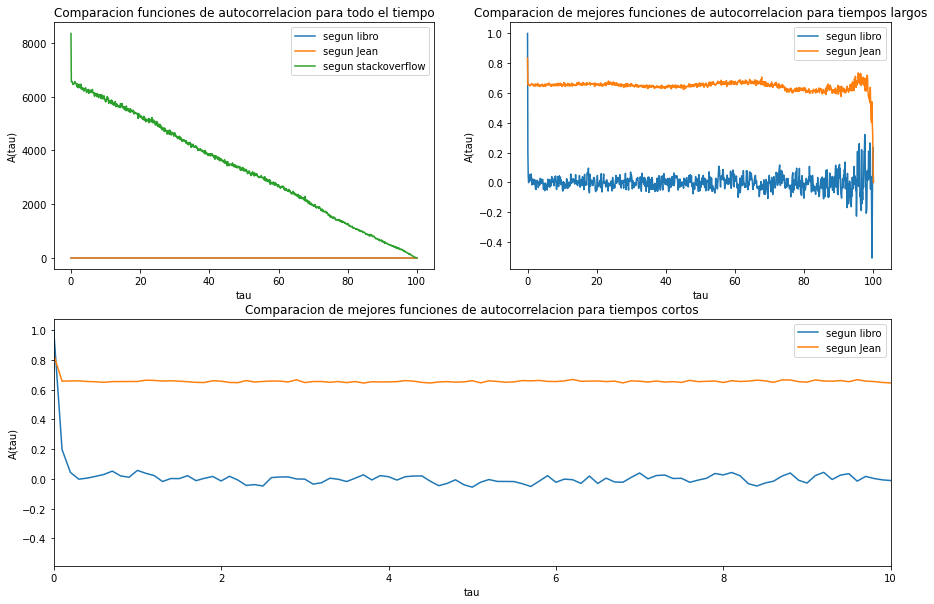

In [106]:
corr = vel_autocorr(t)
corr2 = autocorrelation(dtmin)
corr3 = autocorrelation2(dtmin)
print(corr.size, corr2.size, corr3.size)

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(212)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(221)

ax1.plot(data["t"].unique(), corr, label="segun libro")
ax1.plot(data["t"].unique(), corr2, label="segun Jean")
ax1.set_xlabel("tau")
ax1.set_ylabel("A(tau)")
ax1.legend()
ax1.set_xlim(0,10)
ax1.set_title("Comparacion de mejores funciones de autocorrelacion para tiempos cortos")

ax2.plot(data["t"].unique(), corr, label="segun libro")
ax2.plot(data["t"].unique(), corr2, label="segun Jean")
ax2.set_xlabel("tau")
ax2.set_ylabel("A(tau)")
ax2.legend()
ax2.set_title("Comparacion de mejores funciones de autocorrelacion para tiempos largos")

ax3.plot(data["t"].unique(), corr, label="segun libro")
ax3.plot(data["t"].unique(), corr2, label="segun Jean")
ax3.plot(data["t"].unique(), corr3, label="segun stackoverflow")
ax3.set_xlabel("tau")
ax3.set_ylabel("A(tau)")
ax3.legend()
ax3.set_title("Comparacion funciones de autocorrelacion para todo el tiempo");

# Gifs y graficas espaciales

Text(0, 0.5, 'y')

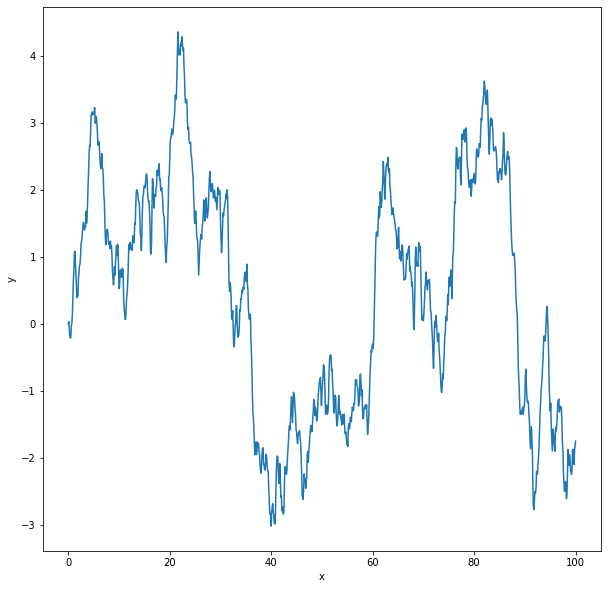

In [107]:
plt.figure(figsize=(10, 10))
for i in data.index.unique():
    plt.plot(data.loc[i]["t"].to_numpy(), data.loc[i]["x"].to_numpy(), label=f"orbita id={i}")
#plt.plot(data["x"].to_numpy(), data["y"].to_numpy(), label="xy")
#plt.legend()
plt.xlabel("x")
plt.ylabel("y")

In [108]:
print(data.loc[0]["t"].to_numpy()[-1]/(dtmin*2))

500.0


In [109]:
#volver a ejecutar si se quiere cambiar el color
R = 1.0
col = np.random.uniform(0, 0.9, (len(data.index.unique()), 3))
print(np.shape(col))

dt = data.loc[0]["t"].to_numpy()[1] - data.loc[0]["t"].to_numpy()[0] 

delta = dt
Moleculas = data[(data["t"]/delta)==np.floor(data["t"]/delta)] #? lo implemente asi porque no me funcionaba con el modulo (data["t"]%delta==0)

cuadros = len(Moleculas.loc[0])
print(cuadros)

(1, 3)
653


MovieWriter ffmpeg unavailable; using Pillow instead.


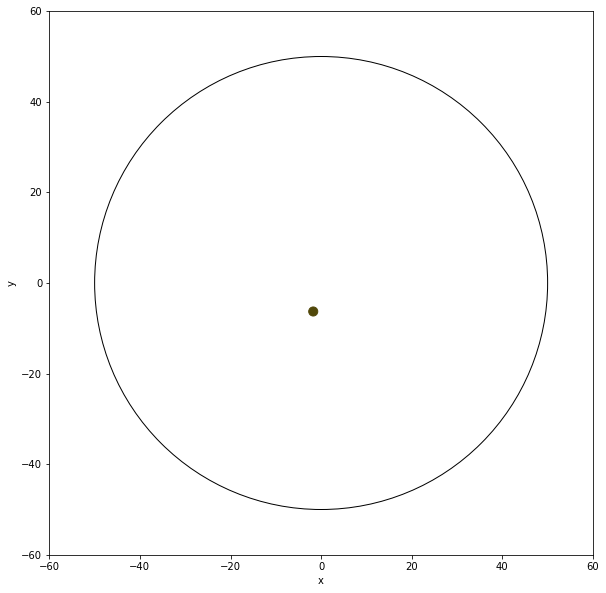

In [110]:
# Define the animation function
def animate(i):
    ax.clear()
    ax.set_aspect('equal')
    ax.set_xlim(-60,60)
    ax.set_ylim(-60,60)
    plt.xlabel("x")
    plt.ylabel("y")
    for j in data.index.unique():
        Molecula = Moleculas.loc[j]
        circle = plt.Circle((Molecula["x"].iloc[i], Molecula["y"].iloc[i]),  R, color=col[j], fill=True)
        ax.add_artist(circle)
    circle = plt.Circle((0, 0), 50, color="black", fill=False)
    ax.add_artist(circle)
    

# Create the animation
fig, ax = plt.subplots(figsize=(10, 10))
anim = animation.FuncAnimation(fig, animate, frames=cuadros, interval=100, repeat=False)

# Save the animation
#anim.save("prueba.gif", savefig_kwargs={'facecolor':'white'})